# Exploratory Data Analysis(EDA) of beer Reviews

## Objective

What are common features among beers that have received high ratings? Using these features, is it possible to predict which beers will be highly rated in the future? Are there specific qualities breweries can focus efforts in order to offer a product that will gain customer clout? 

## Data

This data set contains tasting profiles and consumer reviews for 3197 unique beers from 934 different breweries. It was created by integrating information from two existing data sets on Kaggle: Beer Tasting Profiles Dataset and 1.5 Million Beer Reviews.
https://www.kaggle.com/ruthgn/beer-profile-and-ratings-data-set

The data was previously merged and cleaned. This was verified in previous notebook 1_data_cleaning `here`.

## Hypothesis

We can predict a beer rating on a social app based on its properties.

## Questions to guide analysis:

1. Are there strong coorelations between any variables?
2. Do any features correlate with overall ratings?
3. What are the highest rated beers and their common attributes?
4. Which beers had the most review?
5. Which breweries had the most reviews?
6. Which style had the most reviews?
7. Which subname had the most reviews?
8. Should the focus be on branding and marketing or the blind tasting profile of the product as a priority for predicting ratings?
9. What does the data say about highest rated beer?

## Steps:
- Import data and packages.
- Review data and features.
- Question exploration. What does the data say about highest rated beer?
- Feature exploration (Numerical vs Categorical).
- Correlations
- Insights
- Further steps and questions

## Import data

In [1]:
# import previous data cleaning notebook
from IPython.utils import io
with io.capture_output() as captured:
    %run 1_data_cleaning.ipynb

## Import packages

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Review cleaning work

Check we are working with the correct subset of data where rows with less than 25 reviews are removed. 

In [3]:
beer_data.shape

(2344, 25)

How many unique observations were ther for every column or feature of the dataframe?

In [4]:
#View how many unique data points are in each column
print(beer_data.nunique())

Name                 2255
Style                 111
Brewery               641
Beer Name (Full)     2344
Description          1455
ABV                   172
Min IBU                21
Max IBU                25
Astringency            65
Body                  141
Alcohol               102
Bitter                129
Sweet                 173
Sour                  178
Salty                  20
Fruits                143
Hoppy                 146
Spices                124
Malty                 189
review_aroma         2148
review_appearance    2121
review_palate        2150
review_taste         2182
review_overall       2135
number_of_reviews     786
dtype: int64


We still have a large number of unique beers, breweries and styles. The 'Style' category is of significance when inturpreting the results of a highly rated beer. There are currently too many unique categories for style to effectively analyze as is. 

In [5]:
beer_data.head()

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


## Review the features in the data set

In [6]:
beer_data.columns

Index(['Name', 'Style', 'Brewery', 'Beer Name (Full)', 'Description', 'ABV',
       'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol', 'Bitter',
       'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices', 'Malty',
       'review_aroma', 'review_appearance', 'review_palate', 'review_taste',
       'review_overall', 'number_of_reviews'],
      dtype='object')

Review which breweries had more reviews?

In [7]:
pd.set_option('display.max_rows', 935)
beer_data['Brewery'].value_counts().head(10)

Boston Beer Company (Samuel Adams)    38
Dogfish Head Brewery                  29
Anheuser-Busch                        28
Three Floyds Brewing Co. & Brewpub    25
Victory Brewing Company               22
Rogue Ales                            22
Russian River Brewing Company         19
Matt Brewing Company                  19
Great Divide Brewing Company          18
Founders Brewing Company              17
Name: Brewery, dtype: int64

Review which sub names had the most reviews?

In [8]:
pd.set_option('display.max_rows', 3067)
beer_data['Name'].value_counts().head(10)


Oktoberfest       10
Porter             9
Christmas Ale      5
Nut Brown Ale      5
Winter Ale         5
Smoked Porter      5
India Pale Ale     5
Oatmeal Stout      4
Maibock            4
IPA                4
Name: Name, dtype: int64

Review which style had the most reivews?

In [9]:
pd.set_option('display.max_rows', 112)
beer_data['Style'].value_counts().head(10)


Lager - Adjunct              42
Lager - European Pale        41
Strong Ale - Belgian Dark    40
Pale Ale - English           39
Lambic - Fruit               38
Strong Ale - Belgian Pale    38
Lager - Light                36
Barleywine - American        36
Dubbel                       36
Winter Warmer                36
Name: Style, dtype: int64

Subset the data into highest rated review rows with a threshold of 4.5 stars or higher ratings.

In [10]:
highest_rated = beer_data.loc[(beer_data['review_overall'] >= 4.5)]

How many reviews are have 4.5 ratings or higher?

In [11]:
print(len(highest_rated))

18


What are these highest rated beers?

In [12]:
print(highest_rated['Beer Name (Full)'])

99      Flossmoor Station Restaurant & Brewery Wooden ...
591     Brouwerij Westvleteren (Sint-Sixtusabdij van W...
925         Russian River Brewing Company Pliny The Elder
944       Russian River Brewing Company Pliny The Younger
954           Lawson's Finest Liquids Double Sunshine IPA
959                            The Alchemist Heady Topper
999                           COAST Brewing Company 32/50
1174     U Fleků Pivovaru a Restauraci U Fleku Dark Lager
1342         Brauerei Zehendner GmbH Mönchsambacher Lager
1606          Brasserie Cantillon Cantillon Blåbær Lambik
1637                       The Lost Abbey Duck Duck Gooze
1772    Hair of the Dog Brewing Company / Brewery and ...
1797       Three Floyds Brewing Co. & Brewpub Zombie Dust
1906              Moonlight Brewing Company Reality Czeck
2177    Brouwerij Westvleteren (Sint-Sixtusabdij van W...
2495    Founders Brewing Company Founders CBS Imperial...
3015    Bayerische Staatsbrauerei Weihenstephan Weihen...
3023         L

Sort and view the hightest 51 rated beers.

In [13]:
highest_rated

,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
99,Wooden Hell,Barleywine - English,Flossmoor Station Restaurant & Brewery,Flossmoor Station Restaurant & Brewery Wooden ...,"Notes:GABF 2006 Strong Barrel Aged Bronze, Woo...",9.50,40,60,11,77,...,78,44,51,143,4.605263,4.177632,4.460526,4.605263,4.546053,76
591,Trappist Westvleteren 8 (VIII)Brouwerij Westvl...,Dubbel,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,Brouwerij Westvleteren (Sint-Sixtusabdij van W...,Notes:(Blue Cap)\t,8.00,15,30,15,54,...,77,48,22,75,4.426450,4.415842,4.495050,4.553041,4.514144,707
925,Pliny The Elder,IPA - Imperial,Russian River Brewing Company,Russian River Brewing Company Pliny The Elder,"Notes:Pliny the Elder is brewed with Amarillo,...",8.00,65,100,26,29,...,80,85,1,32,4.612188,4.388603,4.451326,4.630985,4.590028,2527
944,Pliny The Younger,IPA - Imperial,Russian River Brewing Company,Russian River Brewing Company Pliny The Younger,"Notes:Pliny the Younger, the man, was Pliny th...",10.25,65,100,23,46,...,49,106,4,19,4.723770,4.482787,4.612295,4.724590,4.600000,610
954,Double Sunshine,IPA - Imperial,Lawson's Finest Liquids,Lawson's Finest Liquids Double Sunshine IPA,Notes:This American double India pale ale is p...,8.00,65,100,17,32,...,109,102,4,30,4.594118,4.317647,4.311765,4.552941,4.588235,85
959,Heady Topper,IPA - New England,The Alchemist,The Alchemist Heady Topper,Notes:Heddy Topper is an American Double India...,8.00,50,70,16,42,...,76,117,2,30,4.660981,4.163113,4.405117,4.608742,4.625800,469
999,32°/50° Kölsch,Kölsch,COAST Brewing Company,COAST Brewing Company 32/50,Notes:Our take on a kolsch style ale that is s...,4.80,18,25,30,39,...,41,61,9,91,4.016484,4.076923,4.126374,4.241758,4.516484,91
1174,U Fleku Dark Lager,Lager - European Dark,U Fleků Pivovaru a Restauraci,U Fleků Pivovaru a Restauraci U Fleku Dark Lager,Notes:,4.60,15,40,13,58,...,9,32,14,103,4.050000,4.316667,4.216667,4.383333,4.516667,30
1342,Mönchsambacher Lager,Lager - Kellerbier / Zwickelbier,Brauerei Zehendner GmbH,Brauerei Zehendner GmbH Mönchsambacher Lager,Notes:,5.50,20,40,35,39,...,38,77,20,63,4.230769,4.288462,4.384615,4.384615,4.634615,26
1606,Blåbær Lambik,Lambic - Fruit,Brasserie Cantillon,Brasserie Cantillon Cantillon Blåbær Lambik,Notes:Made in cooperation with Jeppe from Olbu...,5.00,15,21,30,25,...,113,12,0,8,4.528846,4.644231,4.493590,4.628205,4.628205,156


In [14]:
highest_rated.iloc[:,5:25]

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
99,9.50,40,60,11,77,90,35,134,28,0,78,44,51,143,4.605263,4.177632,4.460526,4.605263,4.546053,76
591,8.00,15,30,15,54,23,37,115,25,0,77,48,22,75,4.426450,4.415842,4.495050,4.553041,4.514144,707
925,8.00,65,100,26,29,9,58,51,49,0,80,85,1,32,4.612188,4.388603,4.451326,4.630985,4.590028,2527
944,10.25,65,100,23,46,14,73,29,40,0,49,106,4,19,4.723770,4.482787,4.612295,4.724590,4.600000,610
954,8.00,65,100,17,32,23,82,54,67,1,109,102,4,30,4.594118,4.317647,4.311765,4.552941,4.588235,85
959,8.00,50,70,16,42,18,91,40,55,0,76,117,2,30,4.660981,4.163113,4.405117,4.608742,4.625800,469
999,4.80,18,25,30,39,3,32,46,34,3,41,61,9,91,4.016484,4.076923,4.126374,4.241758,4.516484,91
1174,4.60,15,40,13,58,5,45,49,13,0,9,32,14,103,4.050000,4.316667,4.216667,4.383333,4.516667,30
1342,5.50,20,40,35,39,5,53,37,38,1,38,77,20,63,4.230769,4.288462,4.384615,4.384615,4.634615,26
1606,5.00,15,21,30,25,6,5,99,119,0,113,12,0,8,4.528846,4.644231,4.493590,4.628205,4.628205,156


What are the highest rated styles?

In [15]:
highest_rated['Style'].value_counts()

IPA - Imperial                      3
Wheat Beer - Hefeweizen             2
Barleywine - English                1
Dubbel                              1
IPA - New England                   1
Kölsch                              1
Lager - European Dark               1
Lager - Kellerbier / Zwickelbier    1
Lambic - Fruit                      1
Lambic - Gueuze                     1
Old Ale                             1
Pale Ale - American                 1
Pilsner - Bohemian / Czech          1
Quadrupel (Quad)                    1
Stout - American Imperial           1
Name: Style, dtype: int64

What are the highest rated breweries?

In [16]:
highest_rated['Brewery'].value_counts()

Brouwerij Westvleteren (Sint-Sixtusabdij van Westvleteren)    2
Russian River Brewing Company                                 2
Flossmoor Station Restaurant & Brewery                        1
Lawson's Finest Liquids                                       1
The Alchemist                                                 1
COAST Brewing Company                                         1
U Fleků Pivovaru a Restauraci                                 1
Brauerei Zehendner GmbH                                       1
Brasserie Cantillon                                           1
The Lost Abbey                                                1
Hair of the Dog Brewing Company / Brewery and Tasting Room    1
Three Floyds Brewing Co. & Brewpub                            1
Moonlight Brewing Company                                     1
Founders Brewing Company                                      1
Bayerische Staatsbrauerei Weihenstephan                       1
Live Oak Brewing Company                

What are the highest rated ABVs?

In [17]:
highest_rated['ABV'].value_counts()

8.00     4
4.80     2
9.50     1
10.25    1
4.60     1
5.50     1
5.00     1
7.00     1
12.00    1
6.20     1
10.20    1
11.30    1
5.40     1
5.30     1
Name: ABV, dtype: int64

What are the highest rated IBUs Min & Max?

In [18]:
highest_rated['Min IBU'].value_counts()

15    3
65    3
50    2
30    2
25    2
10    2
40    1
18    1
20    1
0     1
Name: Min IBU, dtype: int64

In [19]:
highest_rated['Max IBU'].value_counts()

100    3
40     2
50     2
15     2
60     1
30     1
70     1
25     1
21     1
10     1
65     1
45     1
80     1
Name: Max IBU, dtype: int64

Find the best way to visualize to compare the highest rated beer attributes.

In [20]:
# Review data types again
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2344 entries, 0 to 3195
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2344 non-null   object 
 1   Style              2344 non-null   object 
 2   Brewery            2344 non-null   object 
 3   Beer Name (Full)   2344 non-null   object 
 4   Description        2344 non-null   object 
 5   ABV                2344 non-null   float64
 6   Min IBU            2344 non-null   int64  
 7   Max IBU            2344 non-null   int64  
 8   Astringency        2344 non-null   int64  
 9   Body               2344 non-null   int64  
 10  Alcohol            2344 non-null   int64  
 11  Bitter             2344 non-null   int64  
 12  Sweet              2344 non-null   int64  
 13  Sour               2344 non-null   int64  
 14  Salty              2344 non-null   int64  
 15  Fruits             2344 non-null   int64  
 16  Hoppy              2344 

## Numerical data

Review the summary statistics of each numerical feature in dataframe. 

In [21]:
#summary stats of dataframe
beer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ABV,2344.0,6.660913,2.316489,0.000000,5.000000,6.000000,8.000000,28.000000
Min IBU,2344.0,22.329352,13.349367,0.000000,15.000000,20.000000,25.000000,65.000000
Max IBU,2344.0,40.924915,21.257609,0.000000,25.000000,38.000000,50.000000,100.000000
Astringency,2344.0,17.376280,10.157701,0.000000,10.000000,15.000000,22.000000,77.000000
Body,2344.0,48.620734,24.729193,0.000000,31.750000,42.000000,59.000000,175.000000
Alcohol,2344.0,18.309727,17.627883,0.000000,7.000000,12.000000,23.250000,126.000000
Bitter,2344.0,38.854949,25.421842,0.000000,19.000000,33.000000,54.000000,150.000000
Sweet,2344.0,62.349829,32.850397,0.000000,38.000000,57.000000,81.000000,219.000000
Sour,2344.0,35.386519,35.584863,0.000000,12.000000,25.000000,44.000000,241.000000
Salty,2344.0,1.058874,2.219869,0.000000,0.000000,0.000000,1.000000,48.000000


Wide range of numbers showing the data needs to be normalized and scaled. 

View distributions of each feature

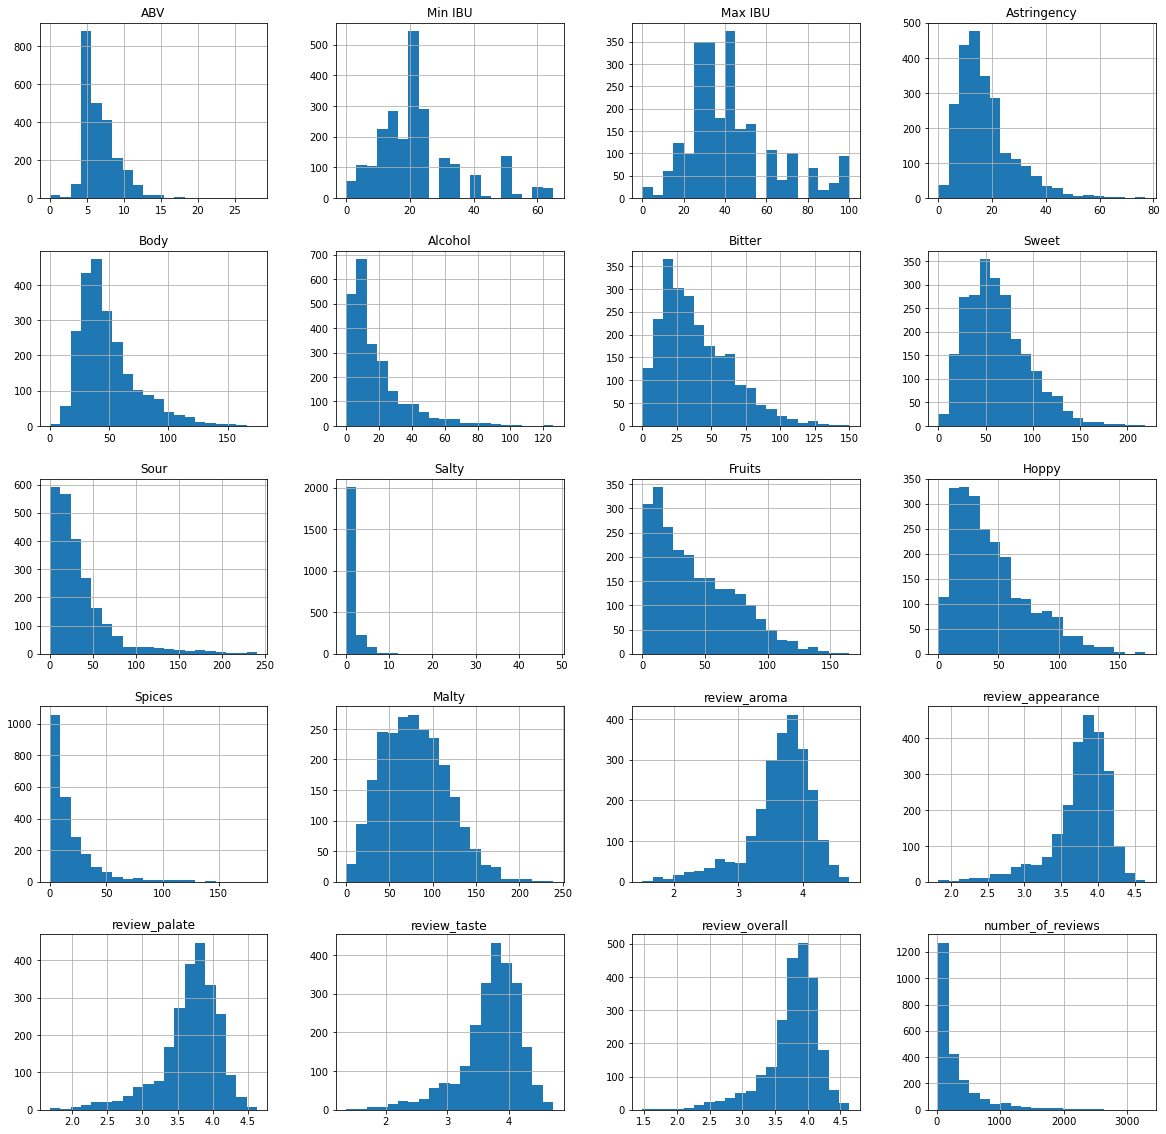

In [22]:
#view numerical data in a histogram to see the distributions
hist=beer_data.hist(bins=20, figsize=(20,20))

View distributions of highly rated beer features

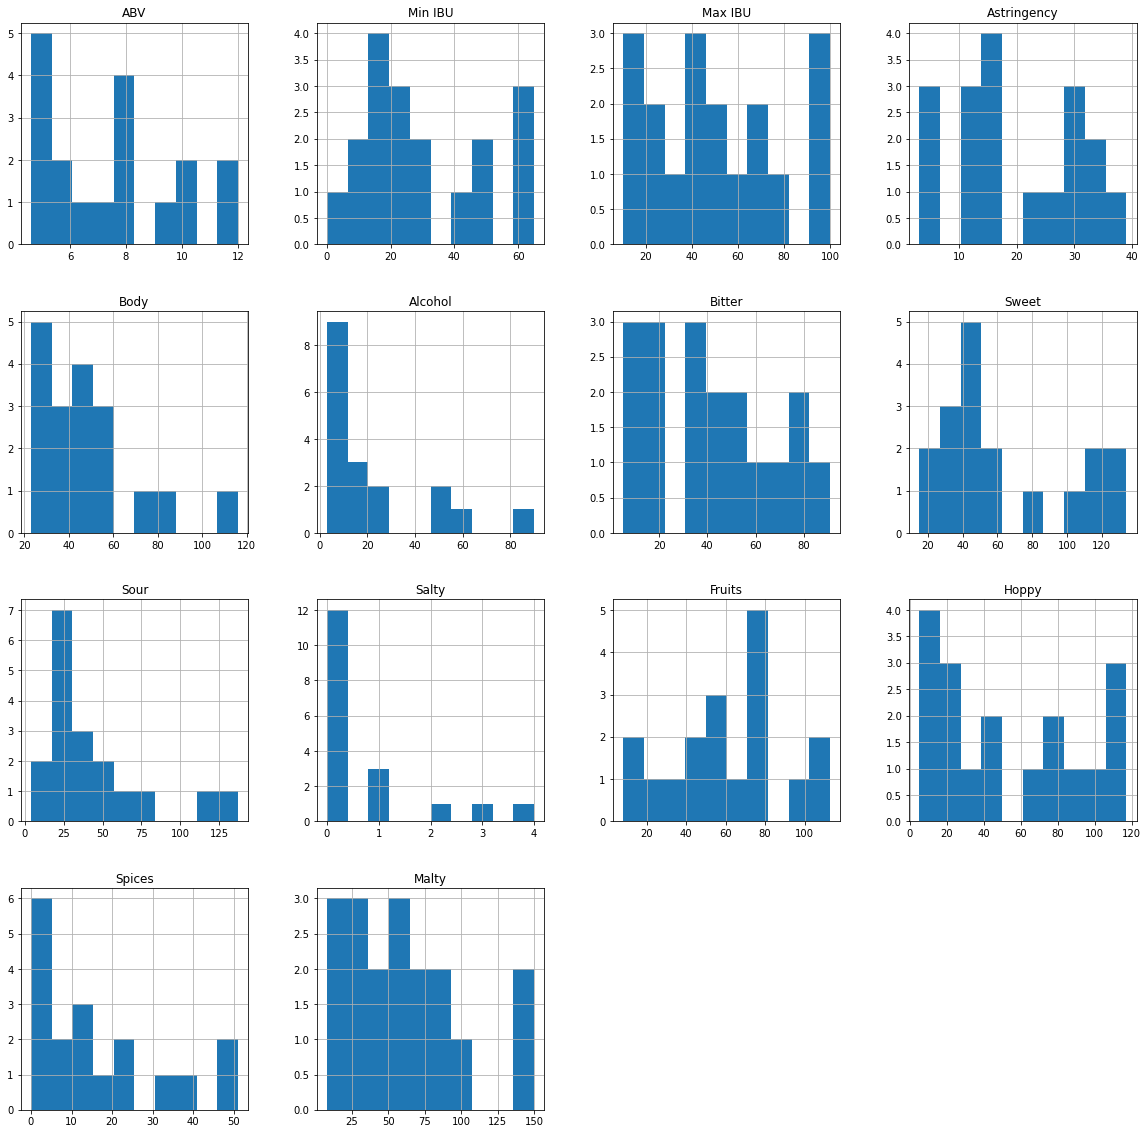

In [23]:
#view numerical data of highly rated beersin a histogram to see the distributions
hist= highest_rated[['ABV', 'Min IBU', 'Max IBU', 'Astringency','Body','Alcohol' , 'Bitter' , 'Sweet', 'Sour' , 'Salty' , 'Fruits', 'Hoppy' , 'Spices' , 'Malty']].hist(figsize=(20,20))

## Catergorical data 

Beer style is particulartly relavant in describing qualities of a beer. We have 111 unique styles which is not optimal for one-hot encoding in order to convert this data to neumerical for modeling. 

In [24]:
#summary stats of categorical data
beer_data.describe(include='object').T

,count,unique,top,freq
Name,2344,2255,Oktoberfest,10
Style,2344,111,Lager - Adjunct,42
Brewery,2344,641,Boston Beer Company (Samuel Adams),38
Beer Name (Full),2344,2344,Alaskan Brewing Co. Alaskan Amber,1
Description,2344,1455,Notes:,884


<AxesSubplot:xlabel='count', ylabel='Style'>

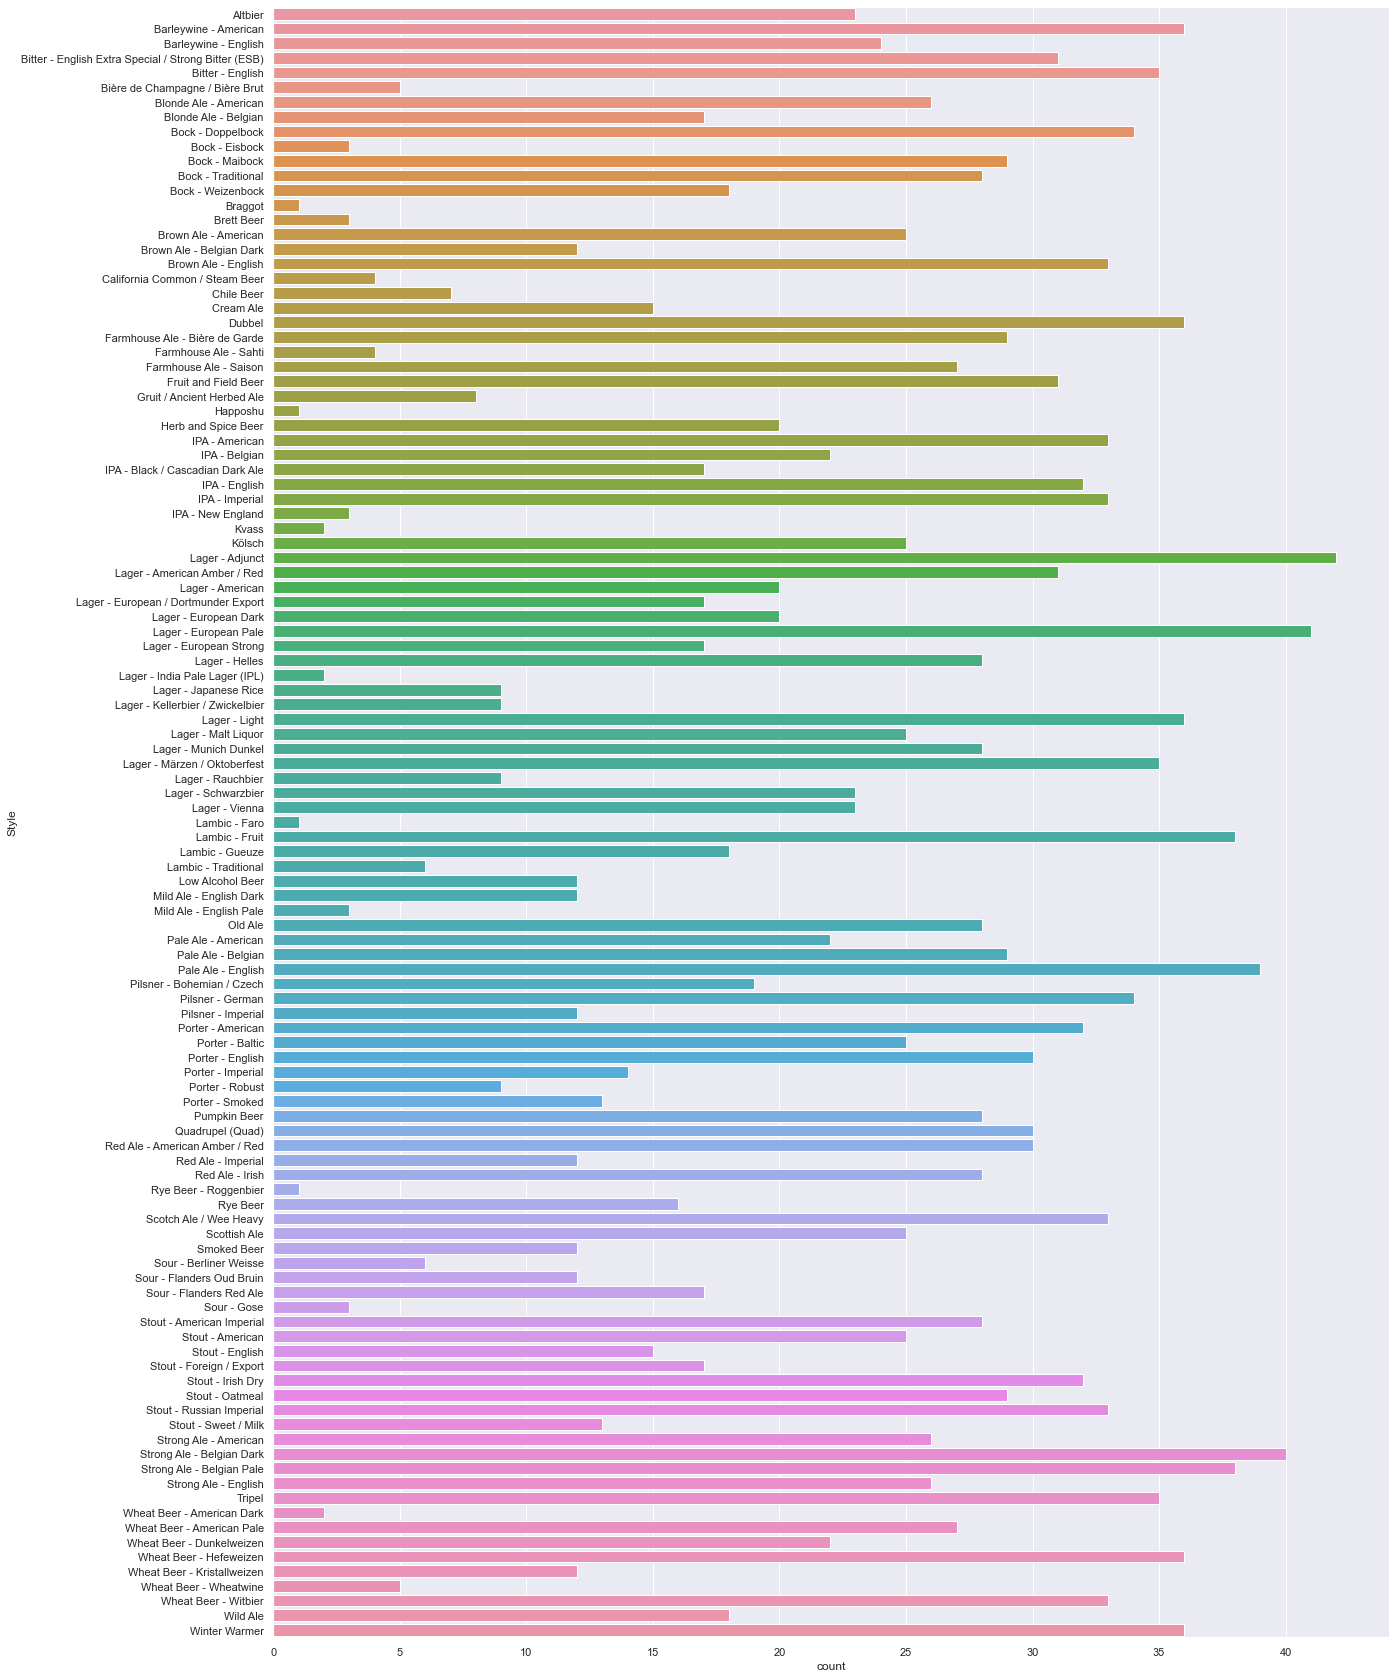

In [25]:
#Visualize the styles and their ratings ocurrance. 

Cat_beer_data = beer_data.select_dtypes(include = 'object').copy()

#get counts of variables
Cat_beer_data.Style.value_counts()

#count plot for one variable
sns.set(rc = {'figure.figsize':(20,30)})
sns.countplot(y= 'Style', data = Cat_beer_data)

In [26]:
#Get value counts of styles column

noStyles = beer_data.Style.value_counts()
print(noStyles)

Lager - Adjunct                                         42
Lager - European Pale                                   41
Strong Ale - Belgian Dark                               40
Pale Ale - English                                      39
Lambic - Fruit                                          38
Strong Ale - Belgian Pale                               38
Lager - Light                                           36
Barleywine - American                                   36
Dubbel                                                  36
Winter Warmer                                           36
Wheat Beer - Hefeweizen                                 36
Tripel                                                  35
Lager - Märzen / Oktoberfest                            35
Bitter - English                                        35
Bock - Doppelbock                                       34
Pilsner - German                                        34
Scotch Ale / Wee Heavy                                  

Visualize how each style ranks in review_overall

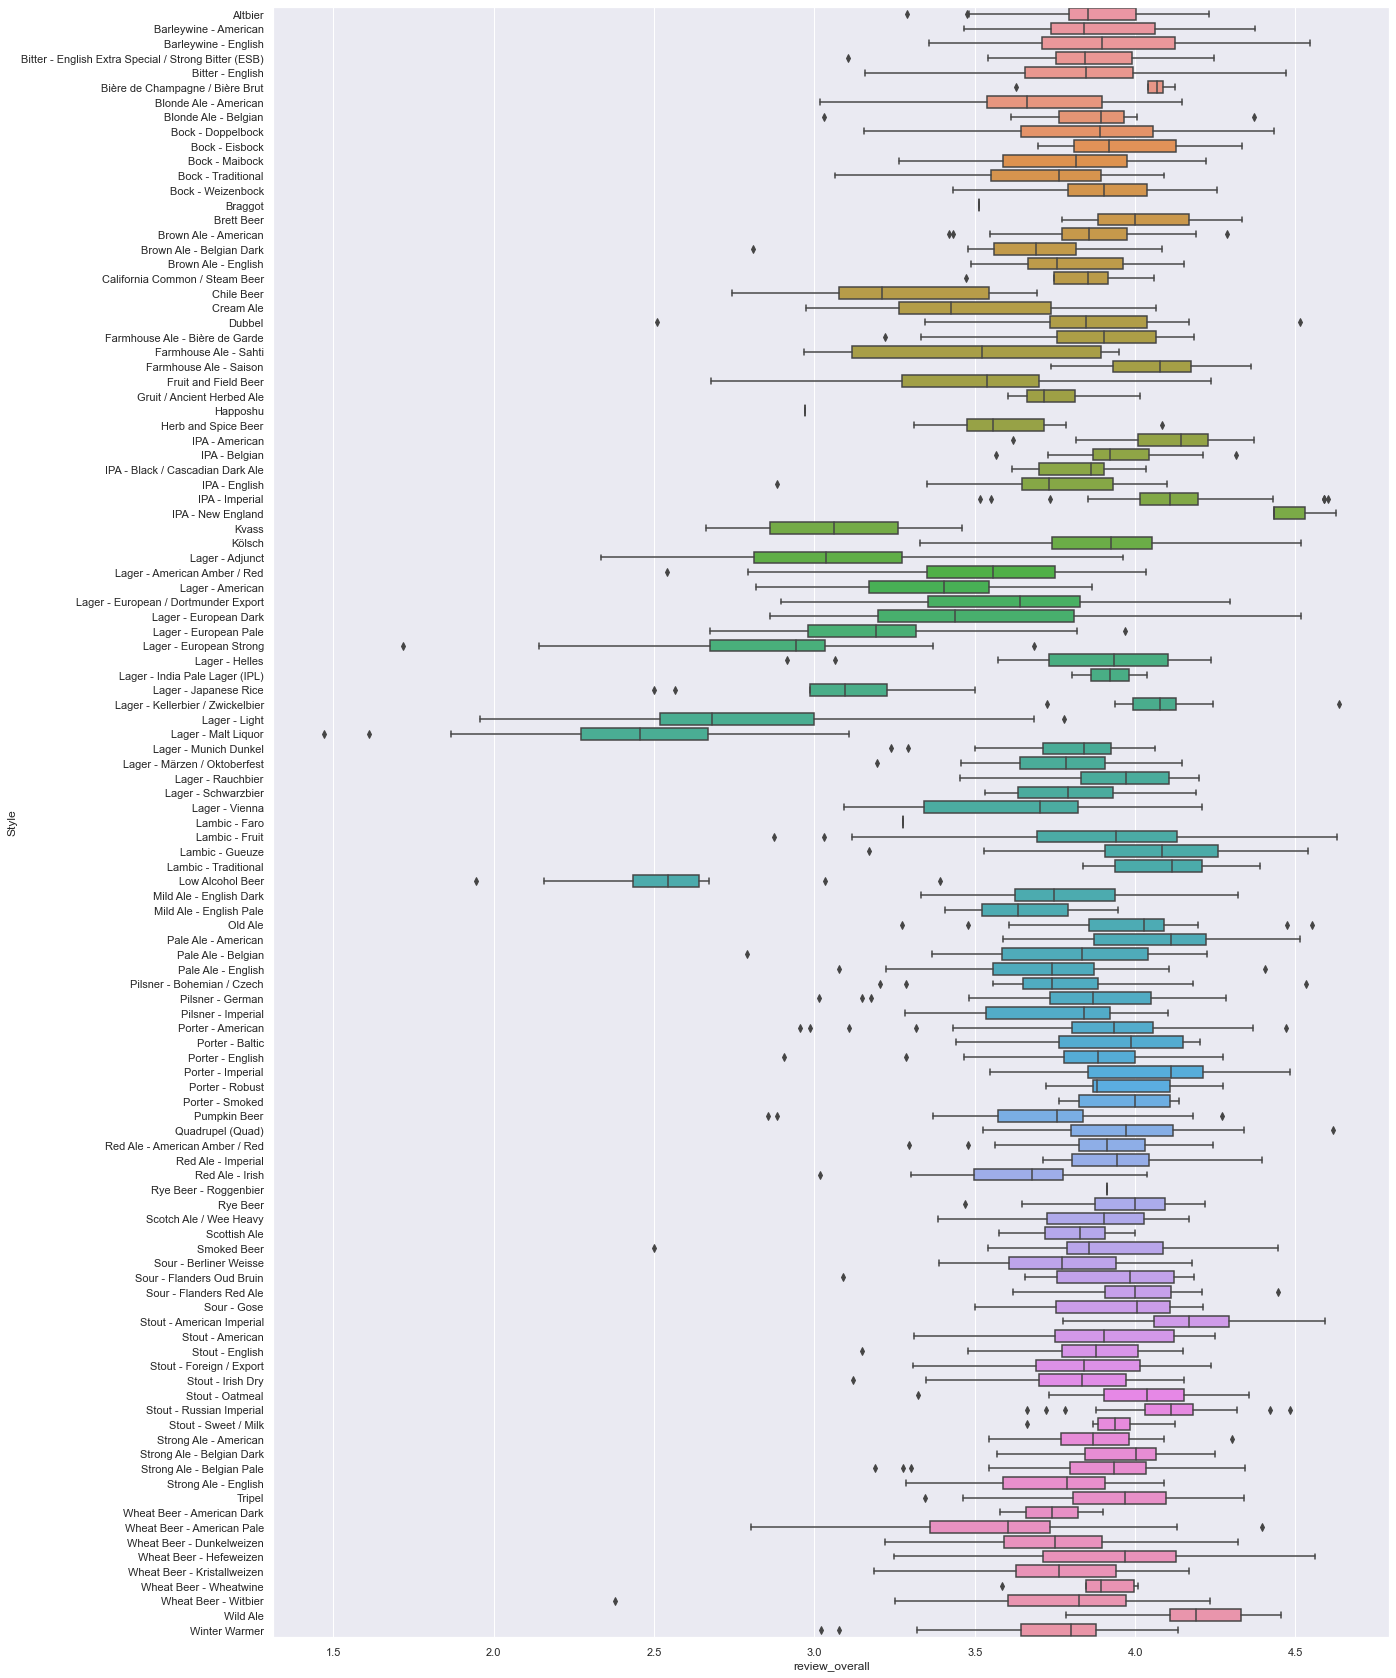

In [27]:
sns.set(rc = {'figure.figsize':(20,30)})
sns.boxplot(y='Style', x='review_overall', data=beer_data)
plt.show()

Clearly visualizing the categorical data is a challenge and doesn't offer much insight. Since the syles category is most relevant to a tasting profile and descriptive qualities in a brand blind tasting, we will only keep this categorical information for further analysis and focus on soly the tasting properties rather than marking of the product in prediction. 

## Target Feature - "review_overall"

View the inital target variable of interest. The "review_overall" feature is continuous. We will only target this review category as all other review categories with high ratings would intuitively correlate with a high overall rating. Let's ignore all other review categories and look for correlations of the tasting profile independant features with the dependent target "review_overall". If another review category appears to have correlations with independent features, then I might reconsider. 

Text(0.5, 1.0, 'Overall Reviews')

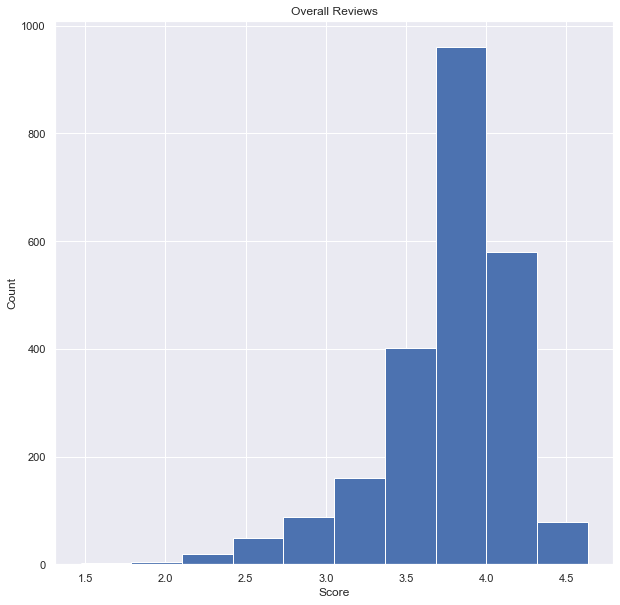

In [28]:
# Making a histogram of the review_overall variable.
beer_data.hist(column="review_overall", figsize=(10,10))
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Overall Reviews')

In [29]:
#Sunmary stats for review_overall feature
beer_data.review_overall.describe()

count    2344.000000
mean        3.764302
std         0.411153
min         1.471154
25%         3.610140
50%         3.840909
75%         4.032853
max         4.634615
Name: review_overall, dtype: float64

View coorelations for each variable pair. 

In [30]:
#caclulate Pearson Coorelation matrix for the variables 
beer_data.corr()

,ABV,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
ABV,1.000000,0.469174,0.556576,-0.247687,0.246548,0.736775,0.041242,0.515416,0.097339,-0.154867,0.313531,-0.100022,0.218042,0.134529,0.490192,0.401738,0.457972,0.451217,0.280912,0.151492
Min IBU,0.469174,1.000000,0.844263,-0.171776,0.272289,0.320879,0.509335,0.175734,-0.115472,-0.096878,0.003318,0.359869,-0.079424,0.232125,0.368839,0.391904,0.374406,0.364834,0.306132,0.206805
Max IBU,0.556576,0.844263,1.000000,-0.235118,0.251503,0.385109,0.437629,0.220562,-0.087509,-0.132870,0.128689,0.292430,0.048422,0.204458,0.406399,0.396745,0.384690,0.377999,0.286492,0.208440
Astringency,-0.247687,-0.171776,-0.235118,1.000000,-0.215768,-0.257757,0.015125,-0.161929,0.535872,0.338491,0.266625,0.260182,-0.127019,-0.247060,0.016167,0.007358,0.052208,0.039208,0.118069,-0.132020
Body,0.246548,0.272289,0.251503,-0.215768,1.000000,0.241538,0.482631,0.391757,-0.217299,-0.153192,-0.164090,-0.036198,0.143101,0.717388,0.383352,0.428123,0.361084,0.382824,0.328023,-0.028888
Alcohol,0.736775,0.320879,0.385109,-0.257757,0.241538,1.000000,-0.038355,0.510036,0.012349,-0.131120,0.215774,-0.143069,0.240403,0.222860,0.289601,0.210190,0.244092,0.244323,0.085100,0.003283
Bitter,0.041242,0.509335,0.437629,0.015125,0.482631,-0.038355,1.000000,-0.018845,-0.207387,-0.027703,-0.202661,0.692958,-0.119659,0.508649,0.243401,0.331576,0.260452,0.256791,0.270482,0.065345
Sweet,0.515416,0.175734,0.220562,-0.161929,0.391757,0.510036,-0.018845,1.000000,0.212190,-0.188378,0.430825,-0.165631,0.092430,0.374534,0.400030,0.350025,0.351008,0.358510,0.219103,-0.035120
Sour,0.097339,-0.115472,-0.087509,0.535872,-0.217299,0.012349,-0.207387,0.212190,1.000000,0.062143,0.775759,0.013439,-0.002231,-0.434554,0.296453,0.214244,0.249860,0.245614,0.211028,-0.041337
Salty,-0.154867,-0.096878,-0.132870,0.338491,-0.153192,-0.131120,-0.027703,-0.188378,0.062143,1.000000,-0.018595,0.150433,-0.053440,-0.067237,-0.134114,-0.140494,-0.094240,-0.111367,-0.057542,-0.050848


See all the numerical data ploted in pairs for coorelation visualization. 

This is a bit hard to see, so I will plot relationships that could be promoising compared to potential target features individually. 

Visualize correlation with a heat map.

<AxesSubplot:>

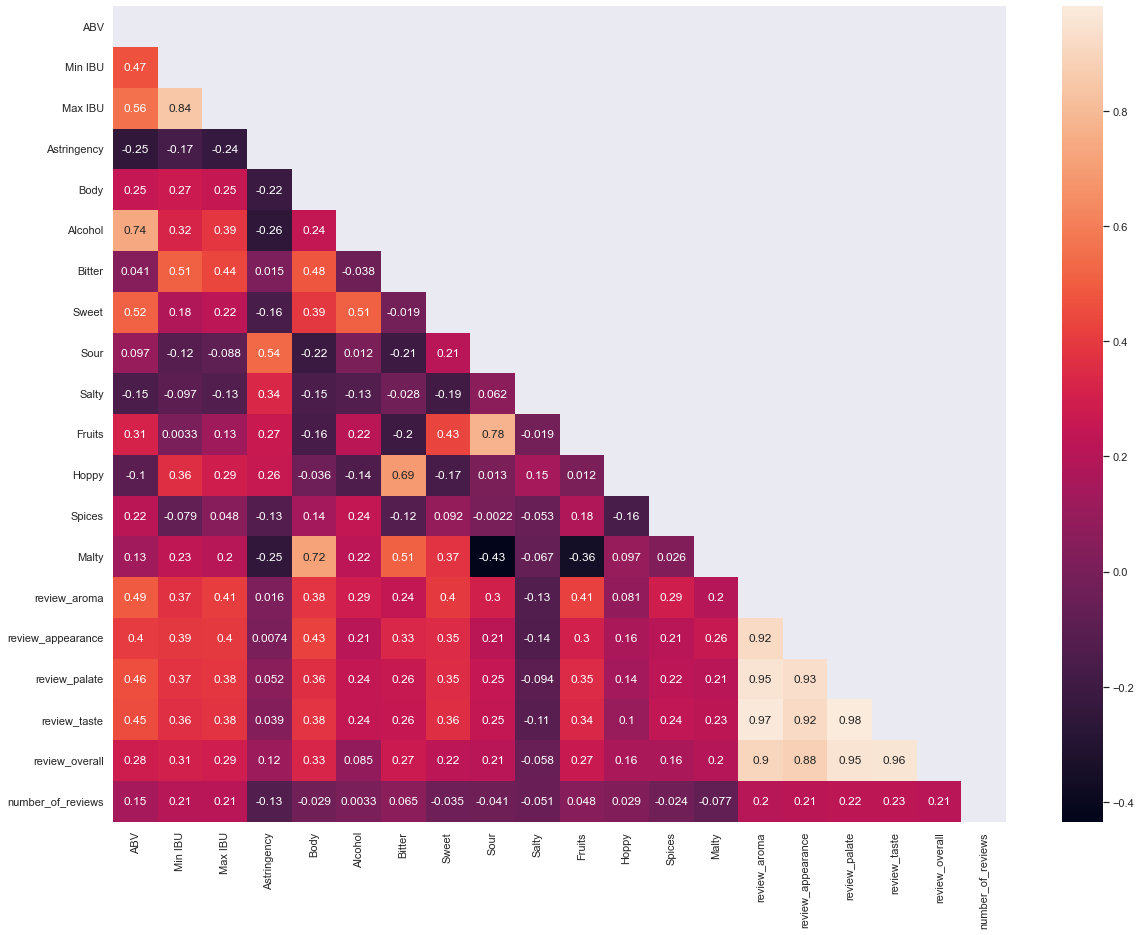

In [31]:
plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(beer_data.corr(), dtype=bool))
sns.heatmap(beer_data.corr(), mask = mask, annot=True)

### Correlations:
#### review_appearance/review_aroma .86
#### review_pallet/review_aroma .91
#### review_taste/review_aroma .94
#### reivew_overal/review_aroma .87
#### review_overal/review_appearance .81
#### review_appearance/review_taste .85
#### review_appearance/reveiw_pallet .87
#### review_taste/review_pallet .95
#### review_overal/review_pallet .92
#### reveiew_taste/review_overall .94
#### Fruits/Sour .79
#### Hoppy/Bitter .71
#### Malty/Body .75
#### MAXIBU/MINIBU .85
#### ABV/Alcohol .65

Visualize the features in pair plots. 

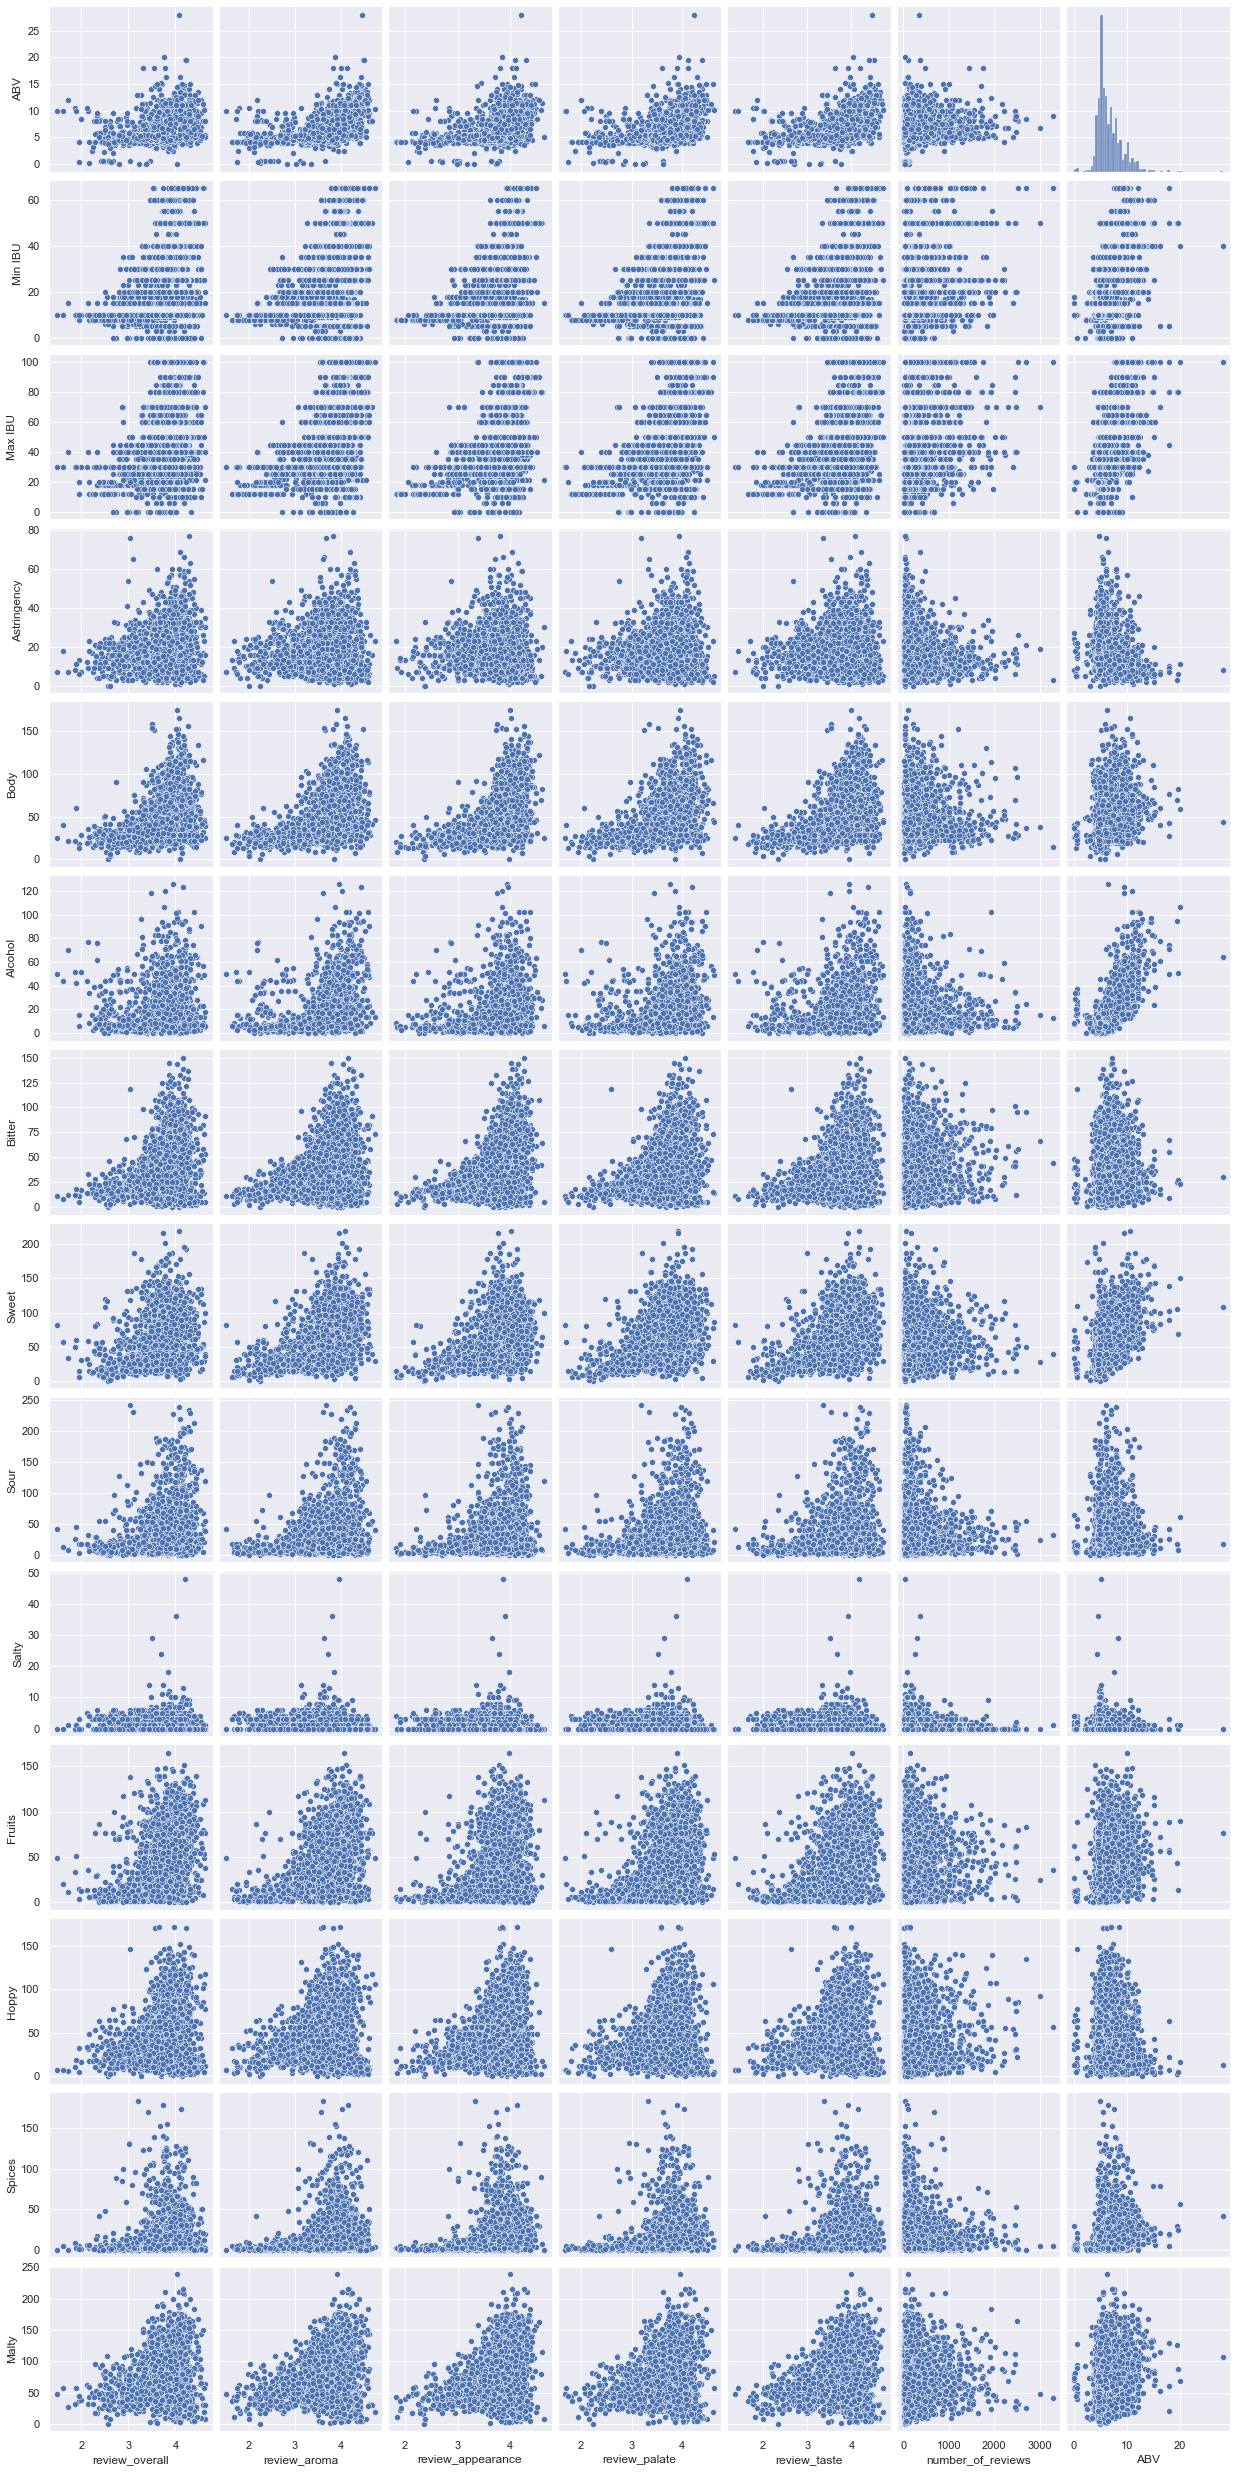

In [32]:
sns.pairplot(
    beer_data,
    x_vars=["review_overall","review_aroma", "review_appearance", "review_palate", "review_taste", "number_of_reviews", "ABV"],
    y_vars=["ABV", "Min IBU", "Max IBU", "Astringency", "Body", "Alcohol", "Bitter", "Sweet", "Sour", "Salty", "Fruits", "Hoppy", "Spices", "Malty",],)

Zoom in on interesting pair plots for closer look at the feature's correlation with overall review. 

ABV 

(0.0, 5.0)

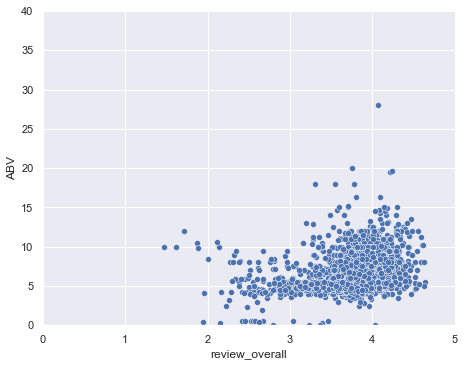

In [33]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["ABV"])
g.fig.set_size_inches(8,6)
plt.ylim(0, 40)
plt.xlim(0, 5)

Min IBU

(0.0, 5.0)

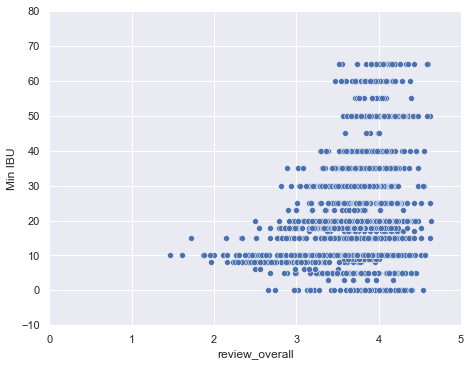

In [34]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["Min IBU"])
g.fig.set_size_inches(8,6)
plt.ylim(-10, 80)
plt.xlim(0, 5)

Max IBU

(0.0, 5.0)

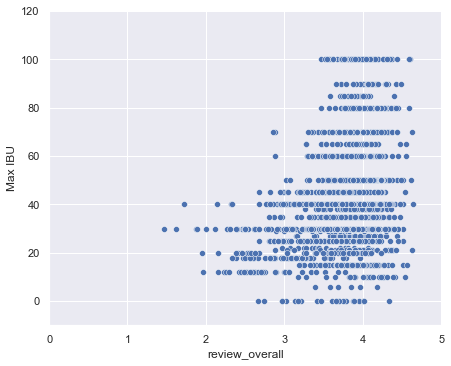

In [35]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["Max IBU"])
g.fig.set_size_inches(8,6)
plt.ylim(-10, 120)
plt.xlim(0, 5)

Hoppy

(0.0, 5.0)

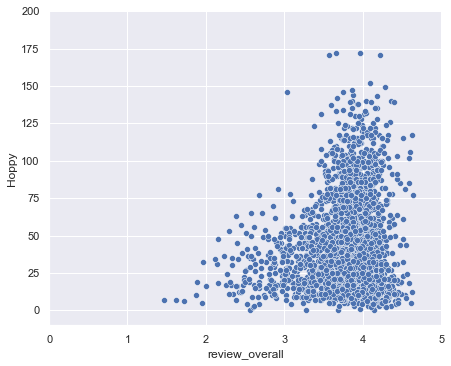

In [36]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["Hoppy"])
g.fig.set_size_inches(8,6)
plt.ylim(-10, 200)
plt.xlim(0, 5)

Fruits

(0.0, 5.0)

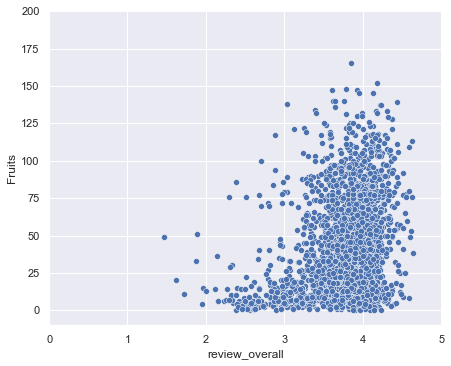

In [37]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["Fruits"])
g.fig.set_size_inches(8,6)
plt.ylim(-10, 200)
plt.xlim(0, 5)

Salty

(0.0, 5.0)

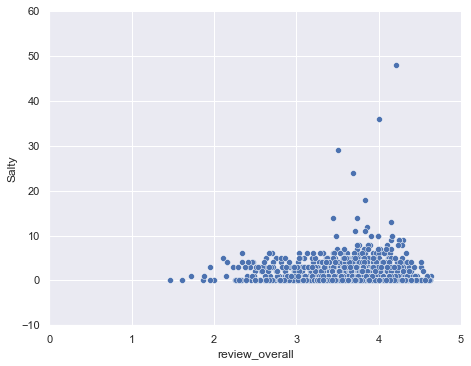

In [38]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["Salty"])
g.fig.set_size_inches(8,6)
plt.ylim(-10, 60)
plt.xlim(0, 5)

Sweet

(0.0, 5.0)

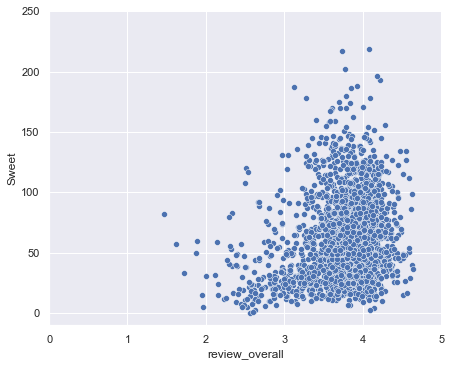

In [39]:
g = sns.pairplot(
    beer_data,
    x_vars=["review_overall"],
    y_vars=["Sweet"])
g.fig.set_size_inches(8,6)
plt.ylim(-10, 250)
plt.xlim(0, 5)

## Observations:
- Each review cataegory is verified to have high correclation with the other as we instinctually knew. 
- No strong negative correlations.
- These correlations are very intuitively accurate. For example the Max and Min IBUs are correlated. Body and Malty could possibly be slightly correlated as one with domain knowledge would expect. Same with ABV and Alcohol features. 
- There are no strong correlations between the tasting profile features and the overall review. 
- Data misses the characteristic of color in analysis which is a likely feature appeal based on domaine knowledge. 

Distributions for outliers in feautures of interest show heavy outliers. 

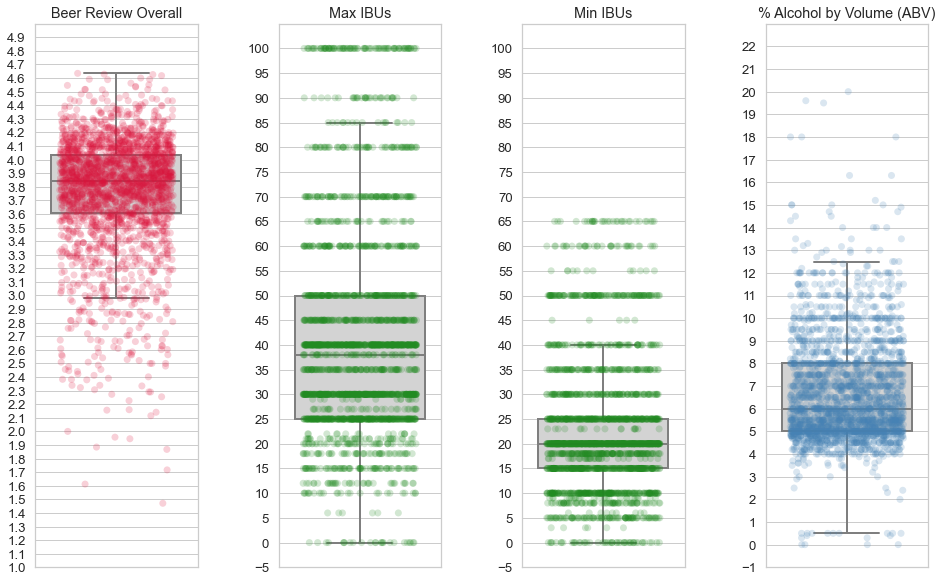

In [40]:
# Set seaborn style parameters.
sns.set(font_scale = 1.2)
sns.set_style("whitegrid")

# Create a boxplot with seaborn.
def make_boxplot(column, axis, color='lightgray', df=beer_data):
    sns.boxplot(data=df, y=column, ax=axis, color=color, linewidth=2, width=0.8, showfliers=False)

# Create a strip plot with seaborn.
def make_stripplot(column, axis, color='purple', df=beer_data):
    sns.stripplot(data=df, y=column,ax=axis, jitter=.35, color=color, size=7,  alpha=.2)

# Create a figure with 3 subplots side-by-side.
fig2, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,10))
fig2.subplots_adjust(wspace=0.5)

# Turn off axis labels.
for ax in [ax1, ax2, ax3, ax4]:
    ax.yaxis.label.set_visible(False)

# Create the review_overall subplot figure.
ax1.set(ylim=(1, 5), yticks=(np.arange(1, 5, .10)), title="Beer Review Overall")
make_boxplot("review_overall", ax1)
make_stripplot("review_overall", ax1, color='crimson')

# Create the IBU subplot figure.
ax2.set(ylim=(-5, 105), yticks=(np.arange(-5, 105, 5)), title="Max IBUs")
make_boxplot("Max IBU", ax2)
make_stripplot("Max IBU", ax2, color='forestgreen')

# Create the IBU subplot figure.
ax3.set(ylim=(-5, 105), yticks=(np.arange(-5, 105, 5)), title="Min IBUs")
make_boxplot("Min IBU", ax3)
make_stripplot("Min IBU", ax3, color='forestgreen')

# Create the ABV subplot figure.
ax4.set(ylim=(-1, 23), yticks=(np.arange(-1, 23, 1)), title="% Alcohol by Volume (ABV)")
make_boxplot("ABV", ax4)
make_stripplot("ABV", ax4, color='steelblue')

## Further questions:
- Should the reduction of the 111 styles to 10 should be handled manually with domain knowledge or with a clustering solution based on properties? What is the optimal number of beer styles to predict the rating? What should the new clusters of styles be titled for interpretability?
- How can the high cardinality of the Style feature be reduced and maintain meaning in the distinction of the styles? 
- What features will have the best success in predicting the beer rating? 
- What should be done with the text in the description category? Should a sentiment analysis be done? Is it a bad idea to ignore the brewery and beer name in analysis and rule out all influence of marketing?

## Next Steps:
- Reduce the amount of categories in the feature "Styles" to 10 or less to help optimize the model and make visualization possible. 
- Encode categorical feature "Style" to prepare for modeling.
- Baseline model. 

## Considerations and future analysis

Too many Style categories make our data hard to visualize and model. The Style column is the only categorical feature we will use in our analysis as names and breweries of the beer will add too much noise. It is irrelavant to this anlysis of beer characteristics and how properties can predict beer ratings. In the future, names and breweries can be a separate analysis with text descriptions to explore sentiment and marketing impact on ratings. Integrating the two projects could yield some interstsing results on prediction. 